In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA, TruncatedSVD

In [2]:
X = pd.read_csv("../preprocessing/X.csv")
y = pd.read_csv("../preprocessing/y.csv")
data = pd.read_csv("../preprocessing/data.csv")
my_colors=['#FFB400', '#FF7C15', '#ED4672', '#A1CE3E', '#162802', '#017075']
color_mapping = {0: my_colors[0], 1: my_colors[1], 2: my_colors[2], 3: my_colors[3], 4: my_colors[4], 5: my_colors[5]}

In [3]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X)

In [4]:
model = DBSCAN(eps=1, min_samples=2)
model.fit(X)
np.unique(model.labels_)
eps_values = [0.1, 0.15, 0.2, 0.25, 0.3]

/tmp/ipykernel_102/1218140887.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


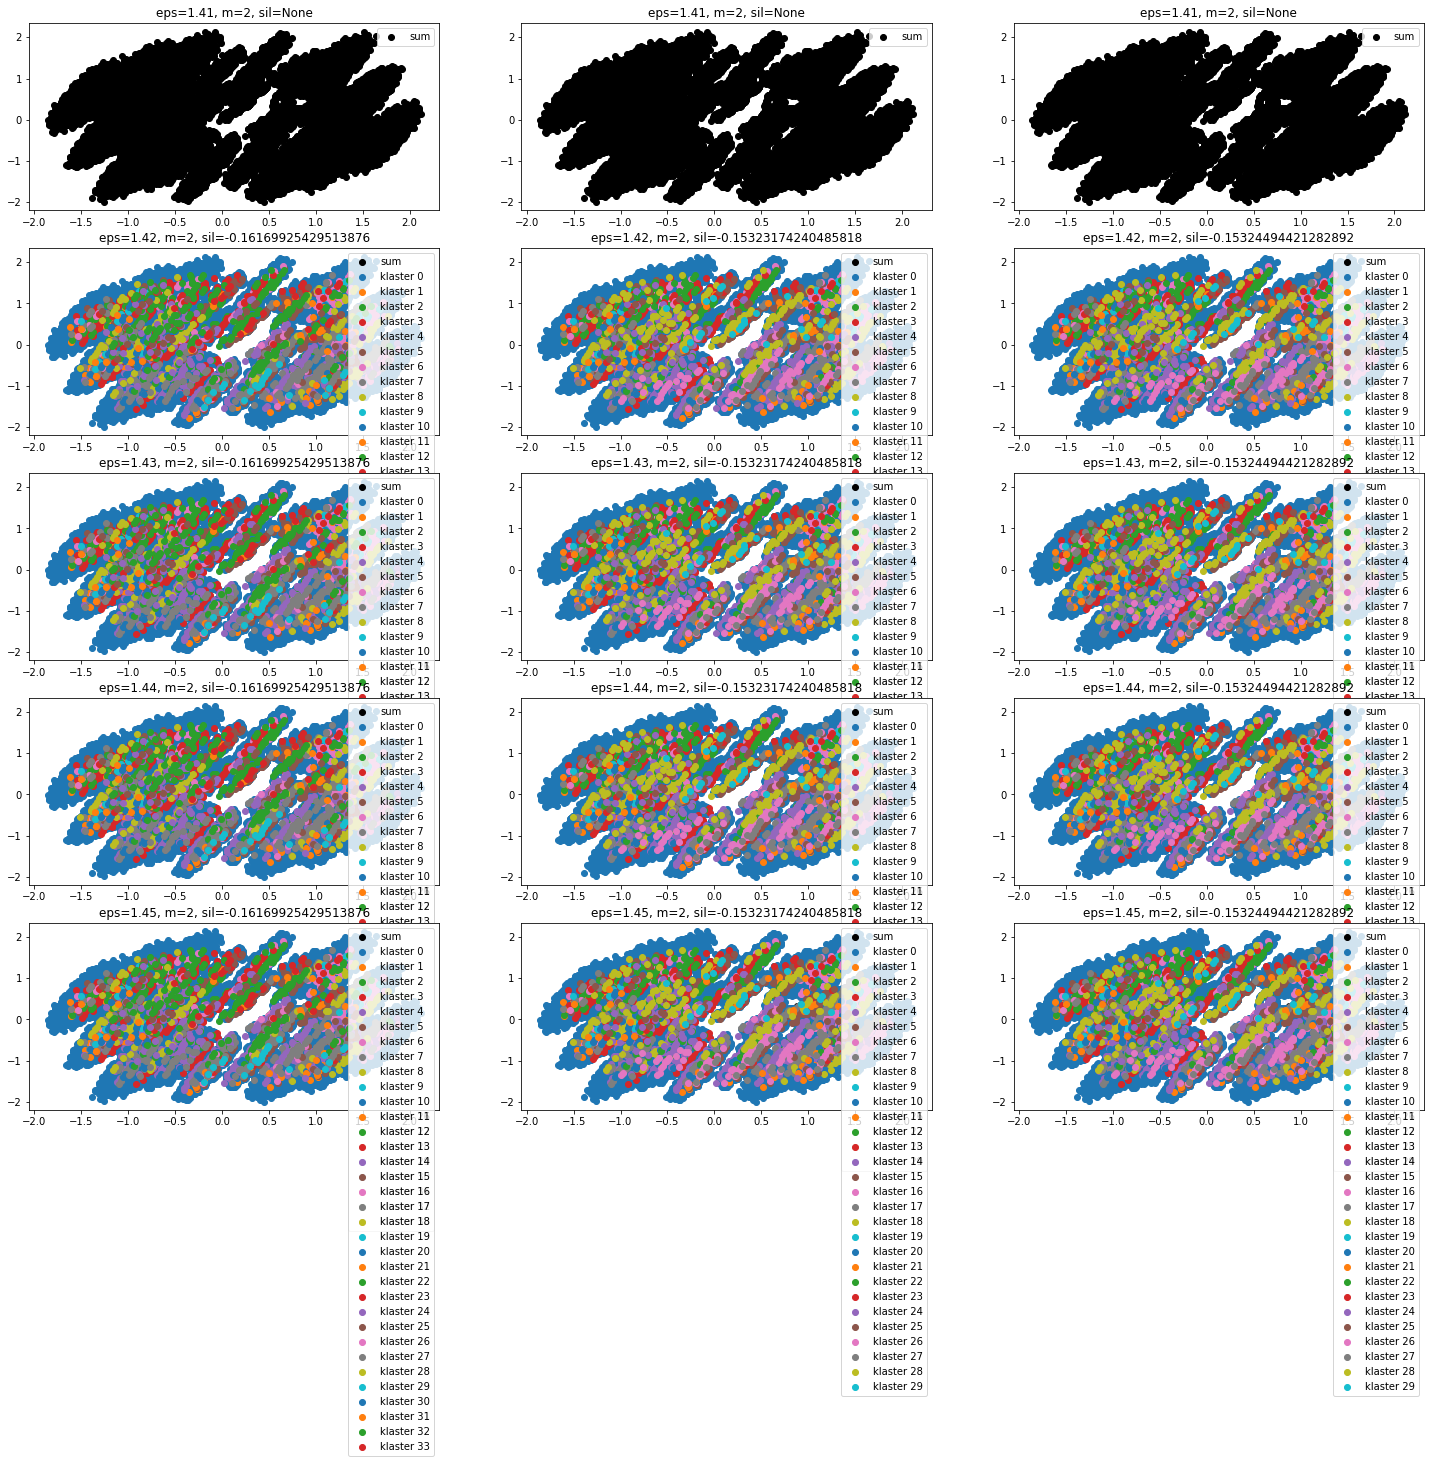

In [5]:
min_samples = 2
eps_values = [1.41, 1.42,1.43, 1.44, 1.45] 
min_samples_values = range(5,8)
fig, plots = plt.subplots(5, 3, figsize = (25, 20))
i = 0
for eps in eps_values:
    for msv in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=msv)
        model.fit(X)
        for cl in np.unique(model.labels_):
            cluster = X_pca_2[model.labels_ == cl]
            if cl == -1: #not in cluster
                plots.flatten()[i].scatter(cluster[:, 0], cluster[:, 1], color='black',label='sum')
            else:
                plots.flatten()[i].scatter(cluster[:, 0], cluster[:, 1], label=f'klaster {cl}')

        plots.flatten()[i].legend(loc='upper right')
        if len(np.unique(model.labels_)) == 1:
            s = None
        else:
            s = silhouette_score(X, model.labels_)
        plots.flatten()[i].set_title(f'eps={eps}, m={min_samples}, sil={s}')
        i += 1
plt.tight_layout()